<h2> Analysis and Visulization of Interest in Big Data Topics</h2>

<b> By Michael Kumakech</b>

In [24]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<b> Download the data set from IBM storage</b>

In [13]:
!wget -O Topic_Survey_Assignment.csv https://cocl.us/datascience_survey_data/Topic_Survey_Assignment.csv 

--2021-11-24 06:44:57--  https://cocl.us/datascience_survey_data/Topic_Survey_Assignment.csv
Resolving cocl.us (cocl.us)... 169.63.100.96, 52.116.123.91
Connecting to cocl.us (cocl.us)|169.63.100.96|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv [following]
--2021-11-24 06:44:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247 [application/octet-stream]
Saving to: ‘Topic_Survey_Assignment.csv’

Topic_Survey_Assign 100%[========

<b> Read and upload the file to the Data frame</b>

In [25]:
df = pd.read_csv("Topic_Survey_Assignment.csv")


In [27]:
df.head(6)

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


<b> Analyse using Descriptive statistics</b>

In [28]:
df.describe()

,Very interested,Somewhat interested,Not interested
count,6.000000,6.000000,6.000000
mean,1280.166667,705.833333,184.833333
std,451.455166,231.135819,210.344876
min,429.000000,444.000000,60.000000
25%,1280.250000,540.000000,81.000000
50%,1336.000000,731.500000,114.500000
75%,1556.750000,761.000000,133.750000
max,1688.000000,1081.000000,610.000000


In [11]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    xlrd-1.2.0                 |           py36_0         188 KB  anaconda
    ------------------------------------------------------------
                                           Total:         475 KB

The following NEW packages will be INSTALLED:

  xlrd               anaconda/linux-64::xlrd-1.2.0-py36_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificate

In [19]:
df.dtypes

Unnamed: 0             object
Very interested         int64
Somewhat interested     int64
Not interested          int64
dtype: object

In [29]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

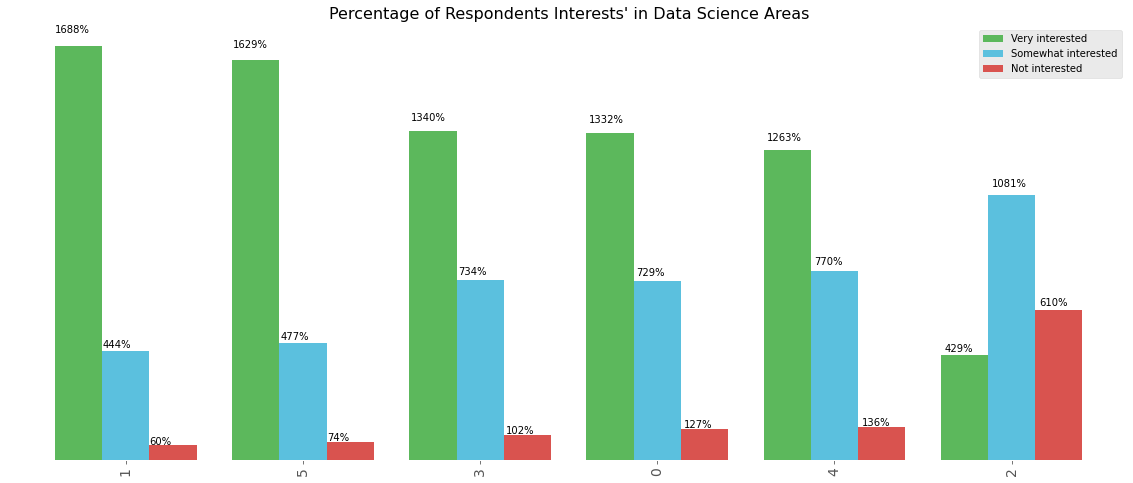

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 1. Sort the dataframe in descending order of Very interested.
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True )

# 2. Convert the numbers into percentages of the total number of respondents.
#    Recall that 2,233 respondents completed the survey. 
#    Round percentages to 2 decimal places.
#df_pct = ((df/2233) * 100).round(2)

ax = df.plot(kind='bar',
                 figsize = (20, 8),
                 width = 0.8,
                 color = ['#5cb85c', '#5bc0de', '#d9534f'],
                 fontsize = 14)

plt.title('Percentage of Respondents Interests\''' in Data Science Areas', fontsize=16) # add title to the plot

# #Solution inspired in https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866
ax.set_facecolor((1.0, 1.0, 1.0))

# #Solution inspired in https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# #Solution inspired in https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()